<a href="https://colab.research.google.com/github/blacksideforce/Adv-ML/blob/main/AdvMl_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

## 1

### События и их вероятности:



$N$ - численность населения

G - виновен:
$$p(G) = \frac{1}{N} $$

I - не виновен:
$$p(I) = 1- p(G)= 1 - \frac{1}{N}$$

X - редкая группа крови:
$$p(X) = 0.01$$

Y - не редкая группа крови:
$$p(Y) = 1 - p(X) = 0.99 $$

### Какие вероятности должен был оценить прокурор?


Прокурор должен был оценить вероятность $p(G|X)$ . Приведем возможное решение:

$$p(I) = p(I|X)p(X) + p(I|Y)p(Y)$$
$$1 - \frac{1}{N} = p(I|X)*0.01 + p(I|Y)*0.99 $$

так как $p(I|Y) = 1$ и $p(G|X) = 1 - p(I|X)$, получаем:
$$ p(G|X) = \frac{1}{0.01N}$$

### Какие вероятности оценил прокурор?


 Из слов прокурора *“Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен"* он скорее всего имел в виду следующую условную вероятность: 

$$p(X|I) = 0.01$$ 

Прокурор должен был оценить $p(G|X)$:

 $$p(G|X) = 1 - p(I|X)$$ 

но оценил $p(G|X)$ следующим образом:
$$p(G|X) \neq 1 - p(X|I)$$ 
что неверно, так как $p(I|X) \neq p(X|I)$, в этом и неправ прокурор.

## 2

### Какие вероятности оценил адвокат?


Из слов адвоката "В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови" он скорее всего имел ввиду следующее:

$$ \frac{p(G|X)}{p(I|X)} = \frac{p(X|G)p(G)}{p(X|I)p(I)}=\frac{1 * 10^{-6}}{0.01 * (1 - 10^{-6})} \approx 0.01 \% $$

А должен был оценить $p(G|X)$.

## 3

## Imports

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 10)  # Размер картинок

import numpy as np

## Theory and functions

$$p(is sick|+) = \frac{1}{1 + 99 * \frac{p(+|notsick)}{1 - p(-|issick)}}$$



$$p(is sick|-) = \frac{1}{1 + 99 * \frac{{1 - p(+|notsick)}}{p(-|issick)}}$$

In [ ]:
def get_ill_prob_true(false_positives,  false_negatives):
  return 1 / (1 + 99 * false_positives /(1 -  false_negatives))

def get_ill_prob_false(false_positives,  false_negatives):
  return false_negatives / (false_negatives + 99 * (1 - false_positives))

## Plots

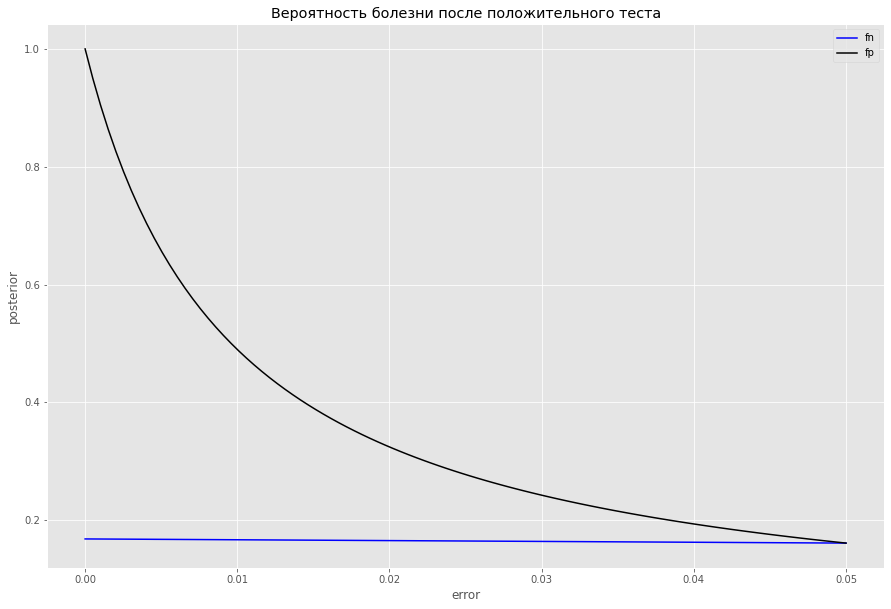

In [ ]:
false_negatives = np.linspace(0.0, 0.05, 100) 
false_positives = np.linspace(0.0, 0.05, 100)

# вероятности болезни после положительного теста
true_after_true_test_from_fp = []
for fp in false_positives:
  true_after_true_test_from_fp.append(get_ill_prob_true(fp, 0.05))

true_after_true_test_from_fn = []
for fn in false_negatives:
  true_after_true_test_from_fn.append(get_ill_prob_true(0.05, fn))

plt.rcParams['figure.figsize'] = (15, 10)  # Размер картинок
plt.plot(false_positives, true_after_true_test_from_fn, label='fn', color = 'blue')
plt.plot(false_negatives, true_after_true_test_from_fp, label='fp', color = 'black')
plt.legend(loc = "best")
plt.xlabel('error')
plt.ylabel('posterior')

plt.title('Вероятность болезни после положительного теста')
plt.show()

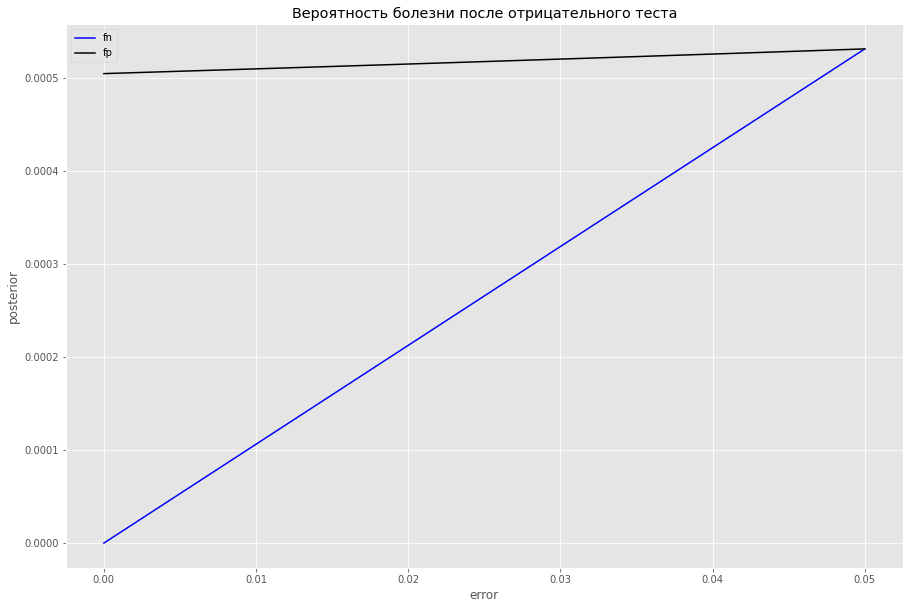

In [ ]:
# вероятности болезни после отрицательного теста
true_after_false_test_from_fp = []
for fp in false_positives:
  true_after_false_test_from_fp.append(get_ill_prob_false(fp, 0.05))

true_after_true_test_from_fn = []
for fn in false_negatives:
  true_after_true_test_from_fn.append(get_ill_prob_false(0.05, fn))

plt.rcParams['figure.figsize'] = (15, 10)  # Размер картинок
plt.plot(false_positives, true_after_true_test_from_fn, label='fn', color = 'blue')
plt.plot(false_negatives, true_after_false_test_from_fp, label='fp', color = 'black')
plt.legend(loc = "best")
plt.xlabel('error')
plt.ylabel('posterior')

plt.title('Вероятность болезни после отрицательного теста')
plt.show()

## Выводы

По графику "Вероятность болезни после положительного теста" видим, что для снижения вероятности ошибки после положительного теста эффективние уменьшить вероятность false_positives  ошибок, чем false_negatives.

По графику "Вероятность болезни после отрицательного теста" видим, что для снижения вероятности ошибки после отрицательного теста эффективние уменьшить вероятность false_negatives  ошибок, чем false_positives.

В завимости от того что важнее(снизить вероятность ошибки после положительного теста или после отрицательного теста), врач сам выбирает снизить те или иные ошибки.

# Part 2

## Imports

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 10)  # Размер картинок

import numpy as np
import pandas as pd

## Loading and preparing data

In [10]:
DAYS = 50


import requests
from io import StringIO
def read_drive_csv(url):
  csv_raw = StringIO(requests.get(url).text)
  
  return pd.read_csv(csv_raw)


DATA_URL = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data_df = read_drive_csv(DATA_URL)

data_df = data_df.loc[(data_df['location'] == 'Russia') & (data_df['date'] > '2020-03-03')].iloc[:DAYS]
data_df['new_cases'].replace(.0, 1, inplace=True)
data_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52923,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.000,0.021,0.000,0.001,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46414.0,0.318,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52924,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.000,0.027,0.007,0.002,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4952.0,51366.0,0.352,0.034,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52925,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.000,0.089,0.062,0.011,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4322.0,55688.0,0.382,0.030,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52926,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.000,0.089,0.000,0.011,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.0,59960.0,0.411,0.029,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52927,RUS,Europe,Russia,2020-03-08,17.0,4.0,2.143,NaN,NaN,0.000,0.116,0.027,0.015,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3231.0,63191.0,0.433,0.022,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52928,RUS,Europe,Russia,2020-03-09,17.0,1.0,2.000,NaN,NaN,0.000,0.116,0.000,0.014,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52929,RUS,Europe,Russia,2020-03-10,20.0,3.0,2.429,NaN,NaN,0.000,0.137,0.021,0.017,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70601.0,0.484,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.94,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52930,RUS,Europe,Russia,2020-03-11,20.0,1.0,2.429,NaN,NaN,0.000,0.137,0.000,0.017,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6362.0,76963.0,0.527,0.044,4364.0,0.030,0.001,1796.6,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.94,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52931,RUS,Europe,Russia,2020-03-12,28.0,8.0,3.429,NaN,NaN,0.000,0.192,0.055,0.023,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4934.0,0.034,0.001,1438.9,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.94,14

## Plots

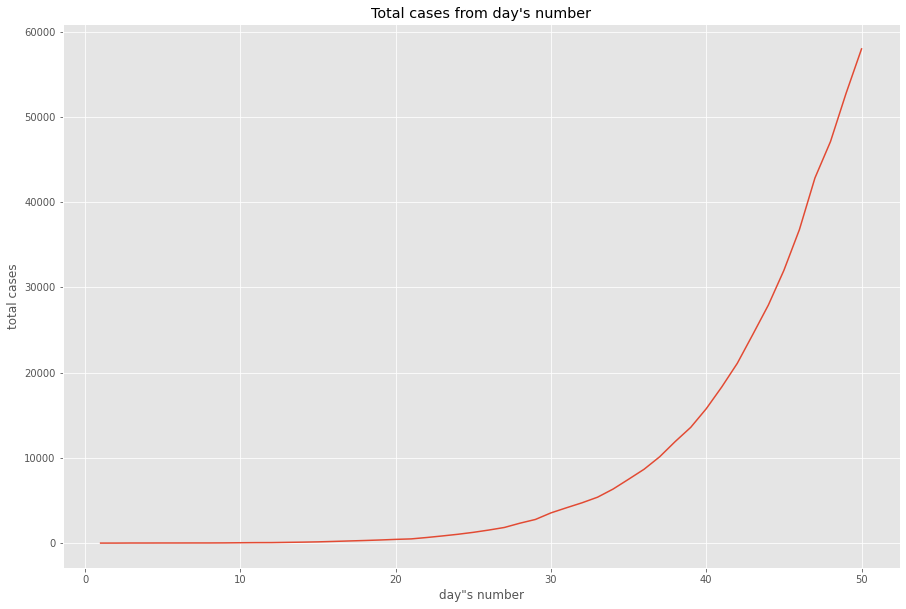

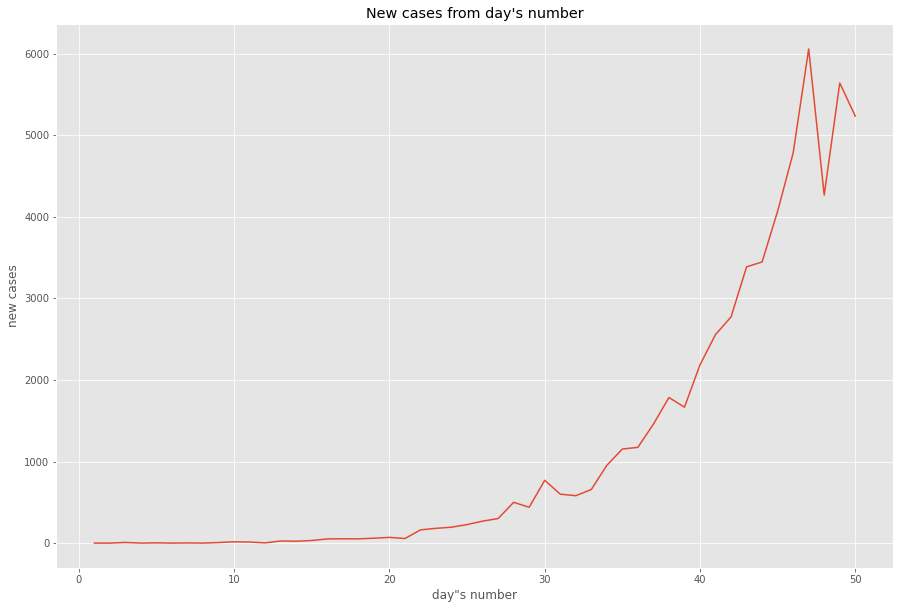

In [11]:
total_cases_array = data_df['total_cases'].to_numpy()
x_array = np.array(range(1, len(total_cases_array) + 1))

plt.xlabel('day"s number')
plt.ylabel('total cases')
plt.plot(x_array, total_cases_array)
plt.title("Total cases from day's number")
plt.show()

plt.xlabel('day"s number')
plt.ylabel('new cases')
new_cases_array = data_df['new_cases'].to_numpy()
plt.plot(x_array, new_cases_array)
plt.title("New cases from day's number")
plt.show()

## 1

### a

In [12]:
def line_regression(y_array, x_array):
    T = len(x_array)
    
    Y = np.expand_dims(y_array, axis=1)
    X = np.concatenate(
        [np.expand_dims(x_array, 1), np.expand_dims(np.ones(T), 1)], 
        axis = 1,
    )

    B = np.linalg.inv(X.T @ X) @ X.T @ Y
    E = (Y - X @B)
    D = (E.T @ E)/(T - 2)
    
    k, b =  B[:,0]
    return k, b, D[0][0], X.T @ X

$$log(y_t) = k * x_t + b + \varepsilon_t, \quad \varepsilon_t \backsim N(0, D)$$

In [13]:
# training line regression
k, b, D, XTX = line_regression(np.log(new_cases_array), x_array)
print("k_mean : {}, b_mean : {}, D_mean : {}, XTX: {}".format(k, b, D, XTX))

k_mean : 0.1826941369050805, b_mean : 0.3893490366457677, D_mean : 0.3807078546709521, XTX: [[42925.  1275.]
 [ 1275.    50.]]


## b(posteriors)


$$ P(k, b | D, DATA) = N((k_{mean}, b_{mean}), D*(X^TX))^{-1})$$

$$ P(D|DATA) =IG(\frac{T-2}{2},\frac{T-2}{2} * D_{mean})$$

$k_{mean} = 0.1826941369050805$

$b_{mean} : 0.389349036645767$

$D_{mean} : 0.3807078546709521$

$X^TX: [[42925,  1275],
 [ 1275,    50]]$

### c

для точной генерации тройки параметров k, b, D сначала генерируем D, потом используя posterior condition генерируем k и b, но в нашем случае будет достаточно брать $D = D_{mean}$ так ее дисперсия достаточно маленькая.

In [15]:
def get_credible_interval(Y, credible_interval):
    import math

    def get_bound(y_list, credible_interval):
        y_list.sort()
        bound_value = credible_interval * len(y_list) 
        
        #округление вверх
        upper_integer_upper_bound = math.ceil(bound_value)
        #округление вниз
        lower_integer_upper_bound = upper_integer_upper_bound - 1

        delta = bound_value - lower_integer_upper_bound

        #берем среднее значение точек 
        y_upper_i =  (1 - delta) * y_list[lower_integer_upper_bound] + delta * y_list[upper_integer_upper_bound]
        
        return y_upper_i
    
    y_upper_bound = []
    y_lower_bound = []
    
    y_len = Y.shape[1]
    for i in range(y_len):
        
        #векторизуем
        predictions = Y[:,i].flatten()
        predictions_mean = predictions.mean()
        
        #разделяем данные на две части: выше или равно среднему значению и ниже среднего значения
        predictions_upper = predictions[predictions >= predictions_mean]
        if len(predictions_upper) == 0 :
            y_upper_i = predictions_mean
        else:    
            y_upper_i = get_bound(predictions_upper, credible_interval)
        
        y_upper_bound += [y_upper_i]
        
        predictions_lower = predictions[predictions < predictions_mean]
        if len(predictions_lower) == 0 :
            y_upper_i = predictions_mean
        else:    
            y_upper_i = - get_bound(predictions_lower * (-1), credible_interval)
        
        y_lower_bound += [y_upper_i]
        
    return [y_upper_bound, y_lower_bound]

#### Графики

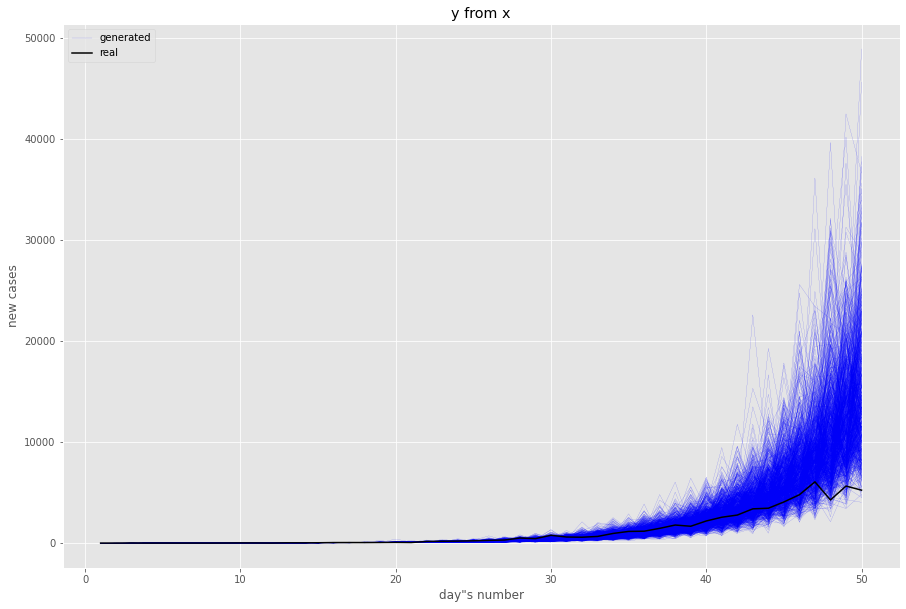

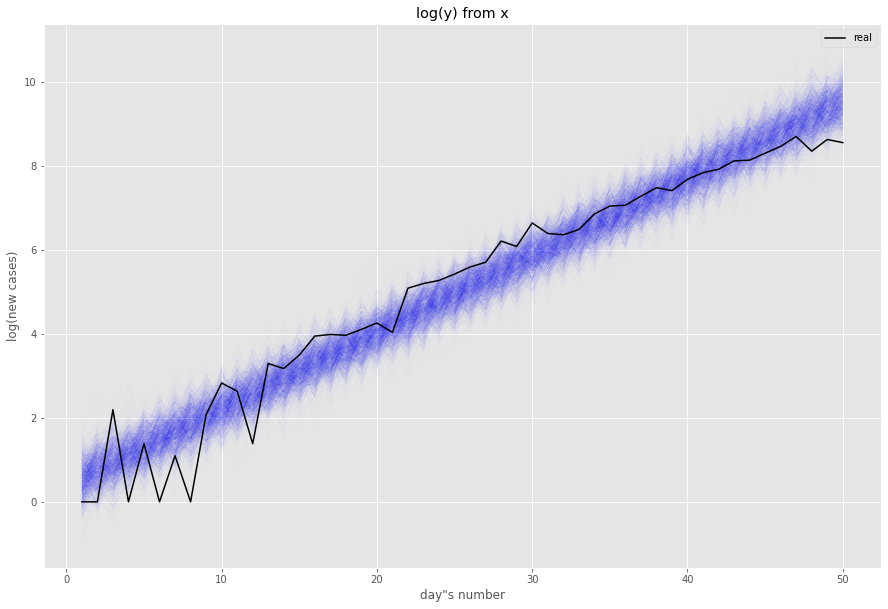

In [33]:
M = 1000
mean = (k, b)
cov = np.linalg.inv(XTX) * D

y_predictions = []
for i in range(M):
  y_list = []
  k_i, b_i = np.random.multivariate_normal(mean, cov).T
  for x_j in range(1, len(x_array) + 1):
    eps_j = np.random.normal(0, D)
    y_list.append(np.exp(k_i * x_j + b_i + eps_j))
  
  y_predictions.append(y_list)
  if i == M - 1: 
    plt.plot(x_array, y_list, color='blue', linewidth=0.1, label='generated')
  else:
    plt.plot(x_array, y_list, color='blue', linewidth=0.1)

plt.plot(x_array, new_cases_array, color='black', label='real')
plt.xlabel('day"s number')
plt.ylabel('new cases')
plt.legend()
plt.plot()
plt.title("y from x")
plt.show()

# plot log y from x
for prediction in y_predictions:
  plt.plot(x_array, np.log(prediction), color='blue', linewidth=0.01)

plt.plot(x_array, np.log(new_cases_array), color='black', label='real')
plt.xlabel('day"s number')
plt.ylabel('log(new cases)')
plt.legend()
plt.plot()
plt.title("log(y) from x")
plt.show()

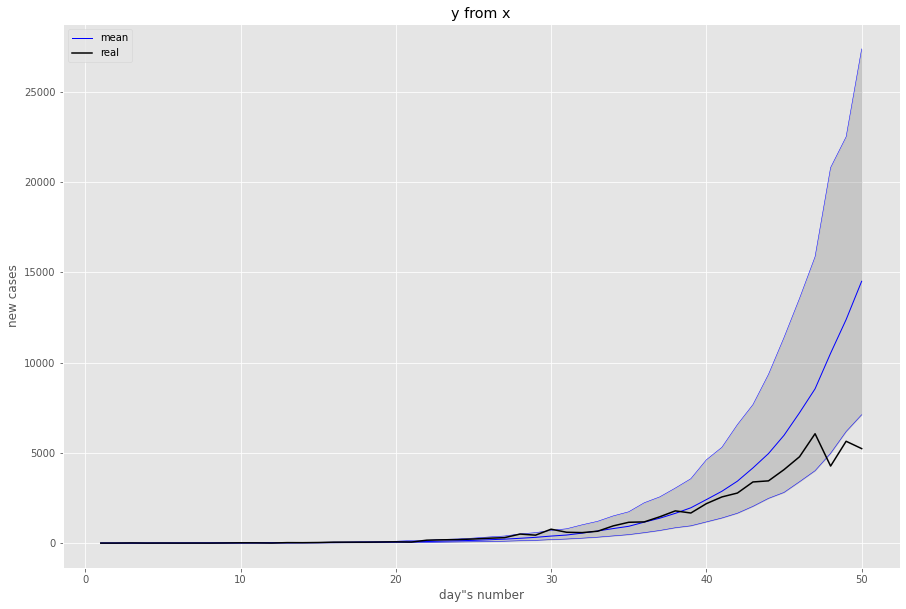

In [34]:
y_predictions_array = np.array(y_predictions)

# получаем границы доверительного интервала
upper_bound, lower_bound = get_credible_interval(y_predictions_array, 0.9) # доверительный интервал от 0.05 до 0.95

# строим границы доверительного интервала
plt.plot(x_array, upper_bound, color='blue', linewidth=0.5)
plt.plot(x_array, lower_bound, color='blue', linewidth=0.5)
plt.plot(x_array, y_predictions_array.mean(axis=0), color='blue', linewidth=1, label='mean')
plt.fill_between(x_array, upper_bound, lower_bound, color = "gray", alpha = 0.3)

plt.plot(x_array, new_cases_array, color='black', label='real') # строим реальные данные
plt.xlabel('day"s number')
plt.ylabel('new cases')
plt.legend()
plt.plot()
plt.title("y from x")
plt.show()

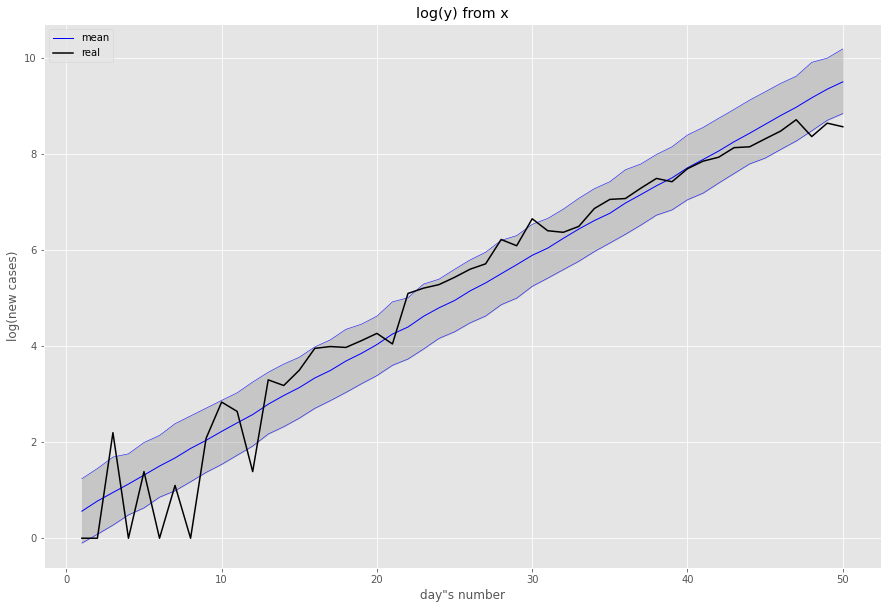

In [35]:
y_predictions_array = np.log(np.array(y_predictions))

# получаем границы доверительного интервала
upper_bound, lower_bound = get_credible_interval(y_predictions_array, 0.9) # доверительный интервал от 0.05 до 0.95

# строим границы доверительного интервала
plt.plot(x_array, upper_bound, color='blue', linewidth=0.5)
plt.plot(x_array, lower_bound, color='blue', linewidth=0.5)
plt.plot(x_array, y_predictions_array.mean(axis=0), color='blue', linewidth=1, label='mean')
plt.fill_between(x_array, upper_bound, lower_bound, color="gray", alpha = 0.3)

plt.plot(x_array, np.log(new_cases_array), color='black', label='real') # строим реальные данные
plt.xlabel('day"s number')
plt.ylabel('log(new cases)')
plt.legend()
plt.plot()
plt.title("log(y) from x")
plt.show()

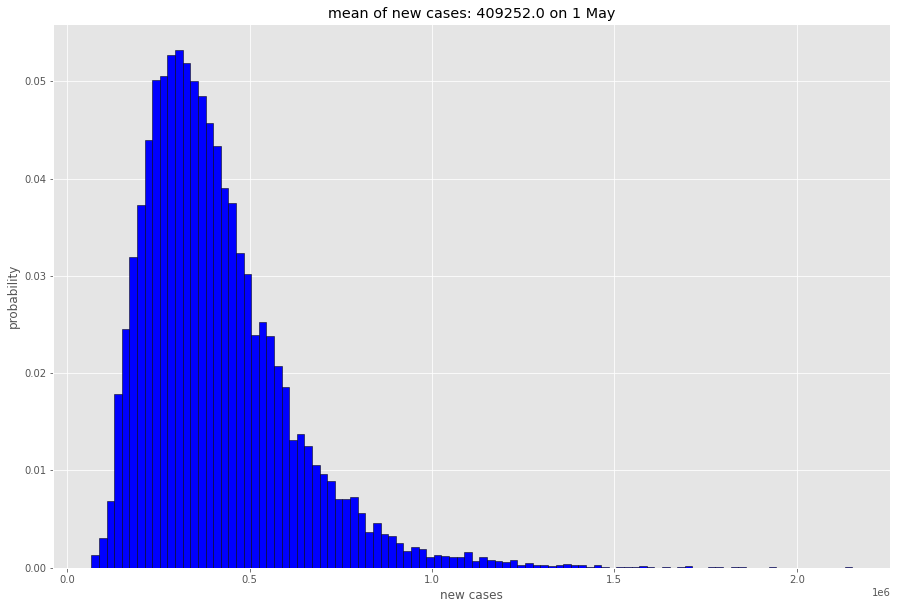

In [63]:
DAY_1_MAY = 68 # 1 мая
x = DAY_1_MAY
M = 10000
predictions = []
for i in range(M):
  k_i, b_i = np.random.multivariate_normal(mean, cov).T
  eps_j = np.random.normal(0, D)
  predictions.append(np.exp(k_i * x + b_i + eps_j))


# Import the libraries
import matplotlib.pyplot as plt

# matplotlib histogram
plt.hist(predictions, color = 'blue', edgecolor = 'black',
         bins = 100, 
         weights = [1/len(predictions)] * len(predictions)
         )
plt.plot()


# Add labels
plt.title('mean of new cases: {} on 1 May'.format(np.round(np.mean(predictions))))
plt.ylabel('probability')
plt.xlabel('new cases')
plt.show()

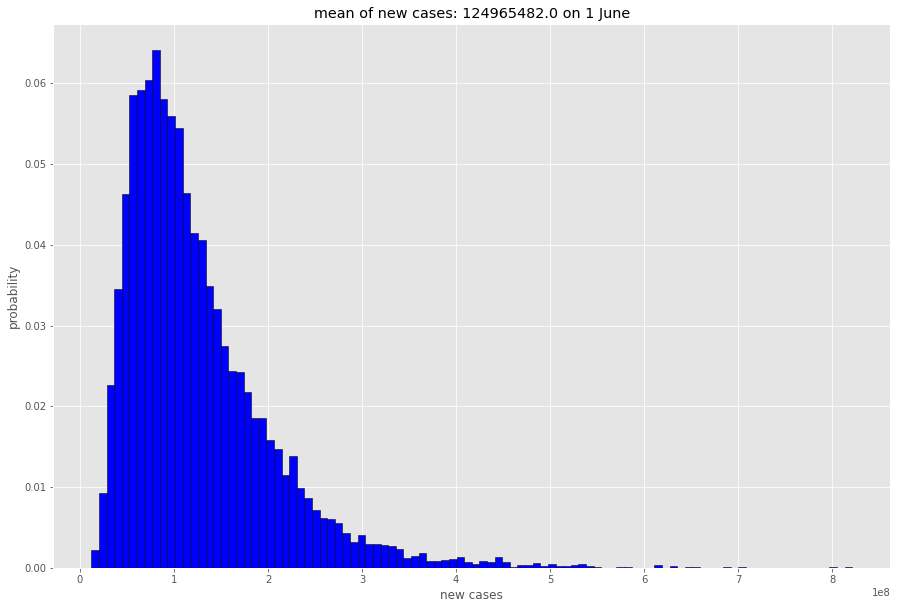

In [67]:
DAY_1_JUNE = 99 # 1 июня

x = DAY_1_JUNE
M = 10000
predictions = []
for i in range(M):
  k_i, b_i = np.random.multivariate_normal(mean, cov).T
  eps_j = np.random.normal(0, D)
  predictions.append(np.exp(k_i * x + b_i + eps_j))


# Import the libraries
import matplotlib.pyplot as plt

# matplotlib histogram
plt.hist(predictions, color = 'blue', edgecolor = 'black',
         bins = 100, 
         weights = [1/len(predictions)] * len(predictions)
)
plt.plot()


# Add labels
plt.title('mean of new cases: {} on 1 June'.format(np.round(np.mean(predictions))))
plt.ylabel('probability')
plt.xlabel('new cases')
plt.show()

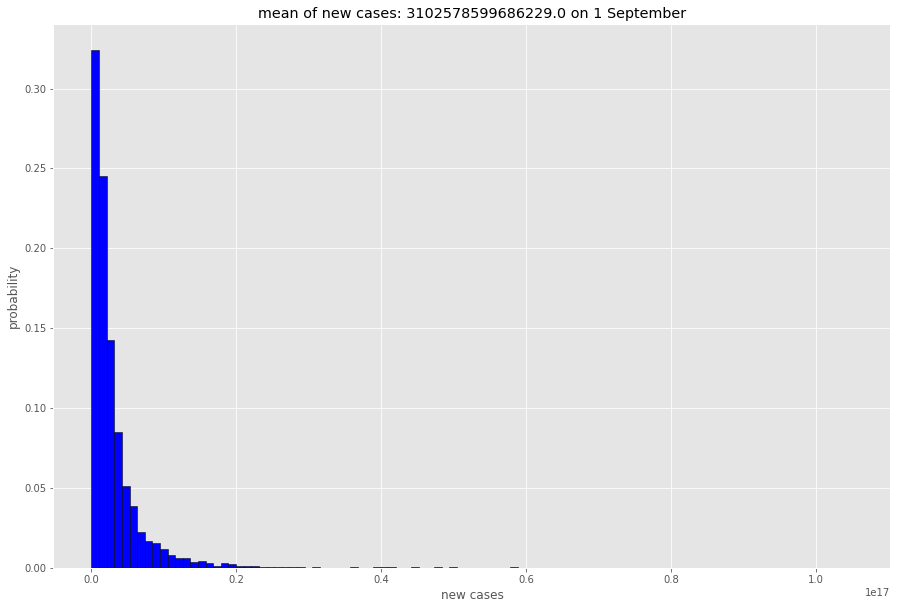

In [70]:
DAY_1_SEMPTEMBER = 190 # 1 сентября

x = DAY_1_SEMPTEMBER
M = 10000
predictions = []
for i in range(M):
  k_i, b_i = np.random.multivariate_normal(mean, cov).T
  eps_j = np.random.normal(0, D)
  predictions.append(np.exp(k_i * x + b_i + eps_j))


# Import the libraries
import matplotlib.pyplot as plt

# matplotlib histogram
plt.hist(predictions, color = 'blue', edgecolor = 'black',
         bins = 100,
         weights = [1/len(predictions)] * len(predictions),
)
plt.plot()


# Add labels
plt.title('mean of new cases: {} on 1 September'.format(np.round(np.mean(predictions))))
plt.ylabel('probability')
plt.xlabel('new cases')
plt.show()

Из предсказаний на 1 мая, 1 июня, 1 сентября очевидно, что экспоненциальная модель неверна.